# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [17]:
from scipy import datasets, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

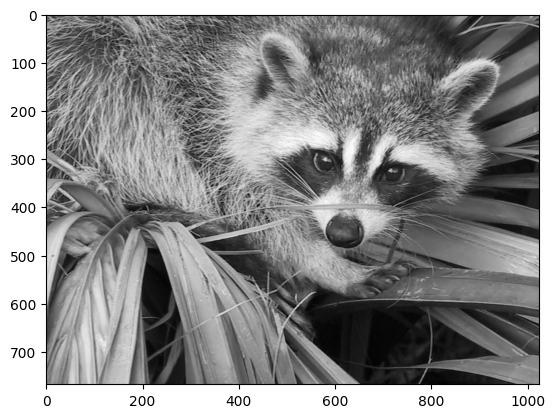

In [21]:
X = datasets.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

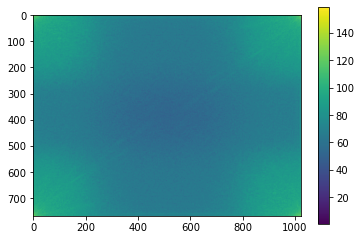

In [5]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

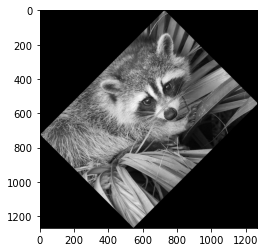

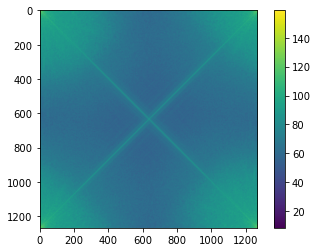

In [9]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

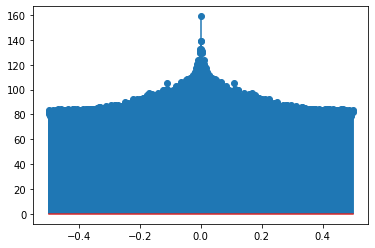

In [10]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

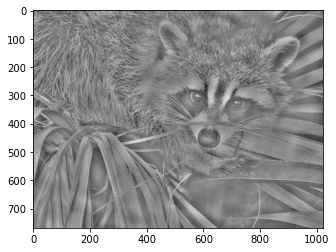

In [11]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

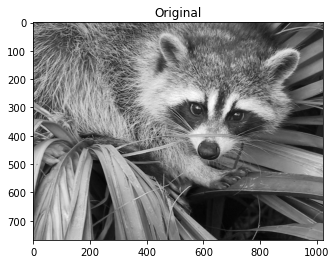

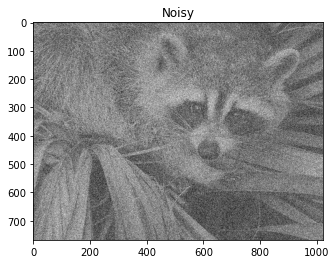

In [23]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

In [ ]:
# Task 1
N = 100
n1 = np.arange(N)
n2 = np.arange(N)
n1_grid, n2_grid = np.meshgrid(n1, n2, indexing='ij')

# 1. x = sin(2*pi*n1 + 3*pi*n2)
# Since n1, n2 are integers, sin(k*pi) = 0.
x1 = np.sin(2*np.pi*n1_grid + 3*np.pi*n2_grid)

# 2. x = sin(4*pi*n1) + cos(6*pi*n2)
# sin(4*pi*n1) = 0, cos(6*pi*n2) = 1.
x2 = np.sin(4*np.pi*n1_grid) + np.cos(6*np.pi*n2_grid)

# 3. Y peaks at (0,5) and (0, N-5)
Y3 = np.zeros((N, N), dtype=complex)
Y3[0, 5] = 1
Y3[0, N-5] = 1
x3 = np.fft.ifft2(Y3).real

# 4. Y peaks at (5,0) and (N-5, 0)
Y4 = np.zeros((N, N), dtype=complex)
Y4[5, 0] = 1
Y4[N-5, 0] = 1
x4 = np.fft.ifft2(Y4).real

# 5. Y peaks at (5,5) and (N-5, N-5)
Y5 = np.zeros((N, N), dtype=complex)
Y5[5, 5] = 1
Y5[N-5, N-5] = 1
x5 = np.fft.ifft2(Y5).real

# Plotting
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

def plot_pair(ax_row, x, title_prefix):
    ax_row[0].imshow(x, cmap='gray')
    ax_row[0].set_title(f'{title_prefix} - Image')
    
    Y = np.fft.fft2(x)
    Y_mag = np.abs(Y)
    # Log scale, handle 0
    Y_log = 20 * np.log10(Y_mag + 1e-9)
    
    ax_row[1].imshow(Y_log, cmap='viridis')
    ax_row[1].set_title(f'{title_prefix} - Spectrum (dB)')

plot_pair(axs[0], x1, '1. sin(2pi*n1 + 3pi*n2)')
plot_pair(axs[1], x2, '2. sin(4pi*n1) + cos(6pi*n2)')
plot_pair(axs[2], x3, '3. Y peaks at (0,5)')
plot_pair(axs[3], x4, '4. Y peaks at (5,0)')
plot_pair(axs[4], x5, '5. Y peaks at (5,5)')

plt.tight_layout()
plt.show()

### Explicații pentru Rezultatele Sarcinii 1

1.  **$x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$**: Deoarece $n_1$ și $n_2$ sunt numere întregi (indici de pixeli), argumentul sinusului este întotdeauna un multiplu întreg de $\pi$, rezultând în 0. Imaginea este neagră, iar spectrul este nul (sau zgomot numeric).
2.  **$x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$**: Similar, $\sin(4\pi n_1) = 0$ și $\cos(6\pi n_2) = 1$ pentru orice $n_1, n_2$ întregi. Rezultatul este o imagine constantă cu valoarea 1. Spectrul are o singură componentă nenulă la frecvența 0 (DC), în colțul (0,0).
3.  **$Y_{0,5} = Y_{0,N-5} = 1$**: Componentele spectrale sunt pe axa verticală a frecvențelor (axa $m_2$). Aceasta corespunde unei variații sinusoidale pe verticală în imagine (dungi orizontale).
4.  **$Y_{5,0} = Y_{N-5,0} = 1$**: Componentele spectrale sunt pe axa orizontală a frecvențelor (axa $m_1$). Aceasta corespunde unei variații sinusoidale pe orizontală în imagine (dungi verticale).
5.  **$Y_{5,5} = Y_{N-5,N-5} = 1$**: Componentele spectrale sunt pe diagonală. Aceasta corespunde unei variații sinusoidale pe diagonală în imagine.

*Notă*: Perechile de puncte simetrice (ex: 5 și N-5) sunt necesare pentru a obține un semnal real în domeniul timpului (simetrie conjugată în frecvență).

In [ ]:
# Task 2: Compress image by attenuating high frequencies until SNR threshold
try:
    X
except NameError:
    # Fallback if X is not defined (e.g. if previous cells weren't run)
    # We need to import datasets again just in case
    from scipy import datasets
    X = datasets.face(gray=True)

def calculate_snr(original, noisy):
    # SNR = 10 * log10( ||original||^2 / ||original - noisy||^2 )
    signal_power = np.sum(original**2)
    noise_power = np.sum((original - noisy)**2)
    if noise_power == 0:
        return float('inf')
    return 10 * np.log10(signal_power / noise_power)

target_snr = 20 # dB
print(f"Target SNR: {target_snr} dB")

Y = np.fft.fft2(X)
Y_shifted = np.fft.fftshift(Y) # Shift DC to center
rows, cols = X.shape
center_row, center_col = rows // 2, cols // 2

# We will use a circular mask radius as the cutoff parameter
# Start with full radius (no compression) and decrease
max_radius = int(np.sqrt(center_row**2 + center_col**2))
best_radius = max_radius
final_snr = float('inf')
X_compressed = X.copy()

# Iterate to find the smallest radius that satisfies SNR >= target_snr
# Or rather, the problem says "attenuate ... UP TO a self-imposed SNR threshold".
# This implies we want to compress AS MUCH AS POSSIBLE while keeping SNR >= threshold.
# So we want the SMALLEST radius that gives SNR >= target.

for radius in range(max_radius, 0, -5):
    # Create mask
    y, x = np.ogrid[-center_row:rows-center_row, -center_col:cols-center_col]
    mask = x*x + y*y <= radius*radius
    
    Y_masked_shifted = Y_shifted * mask
    Y_masked = np.fft.ifftshift(Y_masked_shifted)
    X_recon = np.fft.ifft2(Y_masked).real
    
    snr = calculate_snr(X, X_recon)
    
    if snr < target_snr:
        # SNR dropped below target, so the previous radius was the limit
        # But since we want "up to", maybe this is the point where we stop.
        # Let's keep the last valid one or just stop here.
        print(f"SNR dropped to {snr:.2f} dB at radius {radius}. Stopping.")
        break
    
    best_radius = radius
    final_snr = snr
    X_compressed = X_recon

print(f"Compression complete. Radius: {best_radius}, Final SNR: {final_snr:.2f} dB")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(X_compressed, cmap='gray')
plt.title(f'Compressed (SNR={final_snr:.2f} dB)')
plt.show()

In [ ]:
# Task 3: Remove noise and present SNR before and after
pixel_noise = 200
# Re-generate noise to be consistent with the task description
noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise

snr_noisy = calculate_snr(X, X_noisy)
print(f"SNR of Noisy Image: {snr_noisy:.2f} dB")

# Denoise using Low Pass Filter (Frequency Domain)
# We search for a radius that maximizes SNR(X, X_denoised)
Y_noisy = np.fft.fft2(X_noisy)
Y_noisy_shifted = np.fft.fftshift(Y_noisy)

best_denoised_snr = -float('inf')
best_denoised_radius = 0
X_denoised_best = X_noisy.copy()

# Search range: from small radius (heavy blur) to full image
# We expect an optimum somewhere in between
for radius in range(10, max_radius, 5):
    y, x = np.ogrid[-center_row:rows-center_row, -center_col:cols-center_col]
    mask = x*x + y*y <= radius*radius
    
    Y_filtered_shifted = Y_noisy_shifted * mask
    Y_filtered = np.fft.ifftshift(Y_filtered_shifted)
    X_denoised = np.fft.ifft2(Y_filtered).real
    
    current_snr = calculate_snr(X, X_denoised)
    
    if current_snr > best_denoised_snr:
        best_denoised_snr = current_snr
        best_denoised_radius = radius
        X_denoised_best = X_denoised

print(f"Best Denoising Radius: {best_denoised_radius}")
print(f"SNR after Denoising: {best_denoised_snr:.2f} dB")

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(X, cmap='gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(X_noisy, cmap='gray')
plt.title(f'Noisy (SNR={snr_noisy:.2f} dB)')
plt.subplot(1, 3, 3)
plt.imshow(X_denoised_best, cmap='gray')
plt.title(f'Denoised (SNR={best_denoised_snr:.2f} dB)')
plt.show()